### Classification project using the white wines dataset

### The intent of this project is to create a classification model and learn from the process of creating it.

The details of these datasets are described in [Cortez et al., 2009]: [©Elsevier](http://dx.doi.org/10.1016/j.dss.2009.05.016) [Pre-press (pdf)](http://www3.dsi.uminho.pt/pcortez/wine5.pdf) [bib](http://www3.dsi.uminho.pt/pcortez/dss09-bib.txt)

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('seaborn')

In [2]:
#Load dataset

white_df = pd.read_csv('winequality-white.csv', sep = ';')

In [3]:
print('White wine dataframe shape:', white_df.shape)
white_df.head()

White wine dataframe shape: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
from collections import Counter
# summarize the class distribution
target = white_df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=6.0, Count=2198, Percentage=44.875%
Class=5.0, Count=1457, Percentage=29.747%
Class=7.0, Count=880, Percentage=17.967%
Class=8.0, Count=175, Percentage=3.573%
Class=4.0, Count=163, Percentage=3.328%
Class=3.0, Count=20, Percentage=0.408%
Class=9.0, Count=5, Percentage=0.102%


<AxesSubplot:title={'center':'White Wine'}, ylabel='quality'>

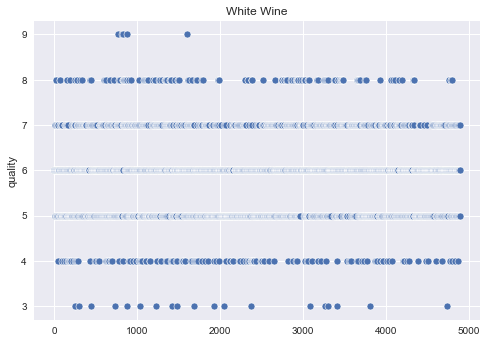

In [5]:
#Visualizing class distribution
plt.title('White Wine')
sns.scatterplot(data = white_df['quality'])

In [6]:
#Missing values
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Scaling numeric data
from sklearn.preprocessing import StandardScaler

#copying the original dataframe

white_df_copy = white_df.copy()

scaler = StandardScaler()

num_cols = white_df.drop('quality', axis = 1).columns

white_df_copy[num_cols] = scaler.fit_transform(white_df[num_cols])
white_df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,6
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,6
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,6
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6


<AxesSubplot:>

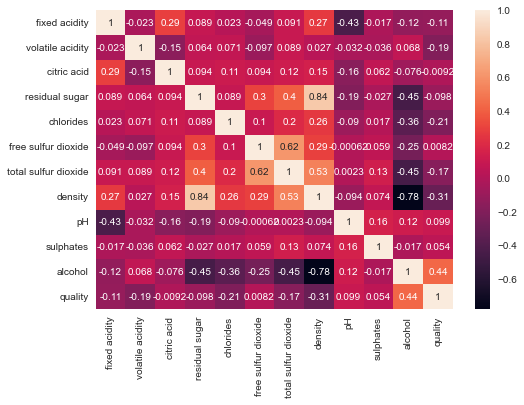

In [8]:
#Correlations
corr = white_df_copy.corr()
sns.heatmap(corr, annot = True)

Due to multiple high correlations, density will be dropped

In [9]:
white_df_copy = white_df_copy.drop('density', axis = 1)

In [10]:
X = white_df_copy.drop('quality', axis = 1)
y = white_df_copy['quality']

In [11]:
#Handling imbalance with SMOTE
from imblearn.over_sampling import SMOTE


In [12]:
# Defining SMOTE
oversample = SMOTE(k_neighbors=4)
X, y = oversample.fit_resample(X, y)

<AxesSubplot:ylabel='quality'>

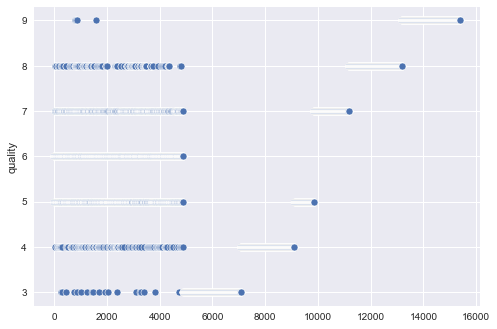

In [13]:
sns.scatterplot(data = y)

In [14]:
target = y
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=6, Count=2198, Percentage=14.286%
Class=5, Count=2198, Percentage=14.286%
Class=7, Count=2198, Percentage=14.286%
Class=8, Count=2198, Percentage=14.286%
Class=4, Count=2198, Percentage=14.286%
Class=3, Count=2198, Percentage=14.286%
Class=9, Count=2198, Percentage=14.286%


In [15]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.2)

In [16]:
print('Shape of the training feature:', X_train.shape)
print('Shape of the testing feature:', X_test.shape)
print('Shape of the training label:', y_train.shape)
print('Shape of the training label:', y_test.shape)

Shape of the training feature: (12308, 10)
Shape of the testing feature: (3078, 10)
Shape of the training label: (12308,)
Shape of the training label: (3078,)


In [17]:
#Function to evalute model using multiple metrics

def model_evaluate(model, X_test, y_test):
    from sklearn import metrics
    
    #predicting test data
    y_pred = model.predict(X_test)
    
    #Calculating accuracy, precision, recall, f1 score and Kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred, average='weighted')
    rec = metrics.recall_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    
     #Create confusion matrix
    confmatrix = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'confmatrix': confmatrix}

In [18]:
#Building Decision Tree Model
from sklearn import tree
 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
#Decision Tree Model results
dtc_eval = model_evaluate(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Confusion Matrix:\n', dtc_eval['confmatrix'])

Accuracy: 0.8398310591293048
Precision: 0.8372853986009737
Recall: 0.8398310591293048
F1 Score: 0.8382272085549529
Cohens Kappa Score: 0.8131137874110124
Confusion Matrix:
 [[433   1   5   2   1   0   0]
 [  5 403  24  17   4   1   0]
 [  6  31 324  55  18   4   0]
 [  6  16  81 249  52  21   0]
 [  0   4  17  52 336  32   0]
 [  0   2   4  10  20 400   1]
 [  0   0   0   1   0   0 440]]


In [20]:
#Building Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [21]:
#Random Forest Model results
rf_eval = model_evaluate(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Confusion Matrix:\n', rf_eval['confmatrix'])

Accuracy: 0.9119558154645874
Precision: 0.9092070271769352
Recall: 0.9119558154645874
F1 Score: 0.9100955869584975
Cohens Kappa Score: 0.8972636626884065
Confusion Matrix:
 [[441   0   0   1   0   0   0]
 [  0 449   3   2   0   0   0]
 [  5  19 359  49   5   1   0]
 [  0   7  66 293  51   6   2]
 [  0   1   1  32 393  14   0]
 [  0   0   0   2   3 431   1]
 [  0   0   0   0   0   0 441]]


In [22]:
#Building Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [23]:
#Naive Bayes Model results
nb_eval = model_evaluate(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Confusion Matrix:\n', nb_eval['confmatrix'])

Accuracy: 0.47498375568551005
Precision: 0.5000060857152743
Recall: 0.47498375568551005
F1 Score: 0.4646609687420725
Cohens Kappa Score: 0.3871842917654701
Confusion Matrix:
 [[160  73  95   8  64  19  23]
 [ 14 230  95  15  85  13   2]
 [ 15  86 225  29  71   9   3]
 [ 23  25 116  57 151  42  11]
 [  4   7  42  27 213 110  38]
 [  4  11  38  17 174 158  35]
 [  0   0   0  11  11   0 419]]


In [24]:
#Building K-Nearest Neighbours Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
#K-Nearest Neighbours Model results
knn_eval = model_evaluate(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Confusion Matrix:\n', knn_eval['confmatrix'])

Accuracy: 0.8528265107212476
Precision: 0.8428529410201858
Recall: 0.8528265107212476
F1 Score: 0.8407509760143794
Cohens Kappa Score: 0.8282063021602872
Confusion Matrix:
 [[442   0   0   0   0   0   0]
 [  1 452   0   0   0   1   0]
 [ 15  43 310  47  18   5   0]
 [ 17  37  94 173  80  23   1]
 [  1   7   6  28 377  22   0]
 [  0   0   1   0   6 430   0]
 [  0   0   0   0   0   0 441]]


In [26]:
#Building SVM RBF Kernel Model 
from sklearn import svm
rbf = svm.SVC(kernel='rbf', gamma=1.9, C=4).fit(X_train, y_train)

In [27]:
#SVM RBF Kernel Model results
rbf_eval = model_evaluate(rbf, X_test, y_test)

# Print result
print('Accuracy:', rbf_eval['acc'])
print('Precision:', rbf_eval['prec'])
print('Recall:', rbf_eval['rec'])
print('F1 Score:', rbf_eval['f1'])
print('Cohens Kappa Score:', rbf_eval['kappa'])
print('Confusion Matrix:\n', rbf_eval['confmatrix'])

Accuracy: 0.9376218323586745
Precision: 0.943531901710915
Recall: 0.9376218323586745
F1 Score: 0.9389042170963597
Cohens Kappa Score: 0.9272330659481123
Confusion Matrix:
 [[438   0   0   4   0   0   0]
 [  0 448   0   6   0   0   0]
 [  0   2 349  86   1   0   0]
 [  0   1  33 376  14   1   0]
 [  0   0   0  36 403   2   0]
 [  0   0   0   6   0 431   0]
 [  0   0   0   0   0   0 441]]


In [28]:
#Building SVM Poly Kernel Model
poly = svm.SVC(kernel='poly', degree=7, C=2).fit(X_train, y_train)

In [29]:
#SVM Poly Kernel Model results
poly_eval = model_evaluate(rbf, X_test, y_test)

# Print result
print('Accuracy:', poly_eval['acc'])
print('Precision:', poly_eval['prec'])
print('Recall:', poly_eval['rec'])
print('F1 Score:', poly_eval['f1'])
print('Cohens Kappa Score:', poly_eval['kappa'])
print('Confusion Matrix:\n', poly_eval['confmatrix'])

Accuracy: 0.9376218323586745
Precision: 0.943531901710915
Recall: 0.9376218323586745
F1 Score: 0.9389042170963597
Cohens Kappa Score: 0.9272330659481123
Confusion Matrix:
 [[438   0   0   4   0   0   0]
 [  0 448   0   6   0   0   0]
 [  0   2 349  86   1   0   0]
 [  0   1  33 376  14   1   0]
 [  0   0   0  36 403   2   0]
 [  0   0   0   6   0 431   0]
 [  0   0   0   0   0   0 441]]


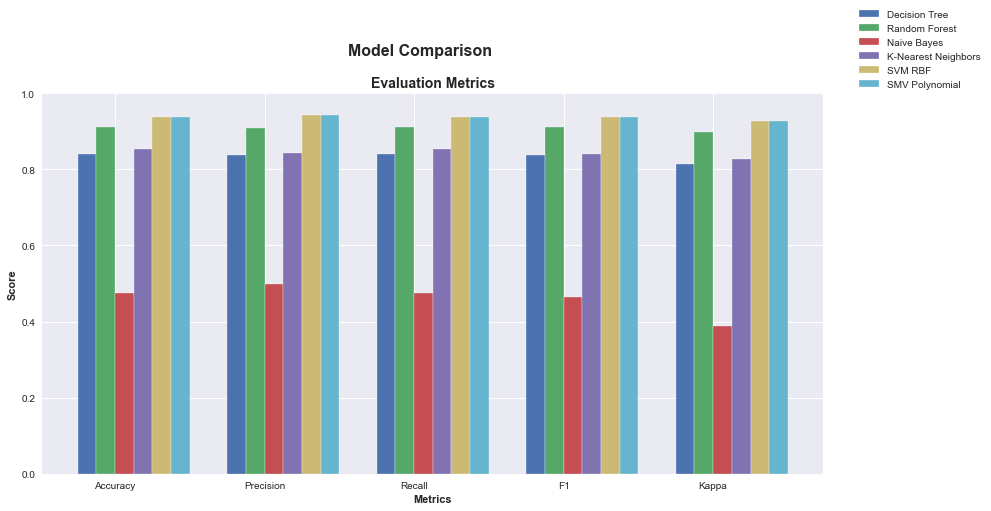

In [42]:
#Graphic Model Comparison

#Setting up figures
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.125
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
rbf_score = [rbf_eval['acc'], rbf_eval['prec'], rbf_eval['rec'], rbf_eval['f1'], rbf_eval['kappa']]
poly_score = [poly_eval['acc'], poly_eval['prec'], poly_eval['rec'], poly_eval['f1'], poly_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

## Make the plot
ax.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax.bar(r5, rbf_score, width=barWidth, edgecolor='white', label='SVM RBF')
ax.bar(r6, poly_score, width=barWidth, edgecolor='white', label='SMV Polynomial')

## Configure x and y axis
ax.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax.set_xticklabels(labels)
ax.set_ylabel('Score', fontweight='bold')
ax.set_ylim(0, 1)

## Create legend & title
ax.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax.legend()
ax.legend(loc=(1.04,1))

plt.show()